# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [239]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [240]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [241]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [242]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [243]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [244]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [245]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [246]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [247]:
len(movies)

244914

### List all Batman movies ever made

In [248]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [249]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [250]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [251]:
hp_df = movies[movies.title.str.contains('Harry Potter', case=False)]
print('Total Harry Potter Movies:', len(hp_df))
hp_df.sort_values(by='year', ascending=False)

Total Harry Potter Movies: 8


,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [252]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [253]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [254]:
len(movies[(movies.year >= 2000) & (movies.year <=2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [255]:
count_hamlet_exact = len(movies[movies.title == 'Hamlet'])
count_hamlet_contains = len(movies[movies.title.str.contains('Hamlet', case=False)])
print('Exact: %i\tContains: %i' %(count_hamlet_exact, count_hamlet_contains))

Exact: 20	Contains: 57


### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [256]:
df_hamlet_after2000 = movies[(movies.title == 'Hamlet') & (movies.year >= 2000)]
print(df_hamlet_after2000.sort_values(by='year', ascending=True))

         title  year
55639   Hamlet  2000
1931    Hamlet  2009
227953  Hamlet  2011
178290  Hamlet  2014
186137  Hamlet  2015
191940  Hamlet  2016
244747  Hamlet  2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [257]:
cast.head()
inception_cast = cast[cast.title == 'Inception']
inception_extras = inception_cast[inception_cast.n.isna()]
print('Inception Extras Count: %i' %len(inception_extras))

Inception Extras Count: 27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [258]:
print('Inception Main Cast Count: %i' %(len(inception_cast) - len(inception_extras)))

Inception Main Cast Count: 51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [259]:
inception_cast.nsmallest(10, 'n')

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [260]:
dumbledore_cast = cast[cast.character == 'Albus Dumbledore']
print(dumbledore_cast)

                                             title  year                 name  \
704984                                  Epic Movie  2007         Dane Farwell   
792421         Harry Potter and the Goblet of Fire  2005       Michael Gambon   
792423   Harry Potter and the Order of the Phoenix  2007       Michael Gambon   
792424    Harry Potter and the Prisoner of Azkaban  2004       Michael Gambon   
947789     Harry Potter and the Chamber of Secrets  2002       Richard Harris   
947790       Harry Potter and the Sorcerer's Stone  2001       Richard Harris   
1685537                      Ultimate Hero Project  2013  George (X) O'Connor   
2248085                                     Potter  2015    Timothy Tedmanson   

          type         character     n  
704984   actor  Albus Dumbledore  17.0  
792421   actor  Albus Dumbledore  37.0  
792423   actor  Albus Dumbledore  36.0  
792424   actor  Albus Dumbledore  27.0  
947789   actor  Albus Dumbledore  32.0  
947790   actor  Albus Du

In [261]:
print(dumbledore_cast.name.unique())

['Dane Farwell' 'Michael Gambon' 'Richard Harris' "George (X) O'Connor"
 'Timothy Tedmanson']


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [262]:
cast_keanu = cast[cast.name == 'Keanu Reeves']
# assuming same character in different movies as separate roles
print(len(cast_keanu))

62


In [263]:
# assume leading roles mean n=1
cast_keanu_leading_after1999 = cast_keanu[(cast_keanu.year >= 1999) & (cast_keanu.n == 1)]
cast_keanu_leading_after1999.drop(['n', 'name'], inplace=True, axis=1)
print(cast_keanu_leading_after1999.sort_values('year'))

                                 title  year   type             character
1892390                     The Matrix  1999  actor                   Neo
1892397               The Replacements  2000  actor           Shane Falco
1892358                      Hard Ball  2001  actor         Conor O'Neill
1892383                 Sweet November  2001  actor           Nelson Moss
1892348                    Constantine  2005  actor      John Constantine
1892388                 The Lake House  2006  actor            Alex Wyler
1892382                   Street Kings  2008  actor  Detective Tom Ludlow
1892385  The Day the Earth Stood Still  2008  actor                Klaatu
1892359                  Henry's Crime  2010  actor           Henry Torne
1892342                       47 Ronin  2013  actor                   Kai
1892361                      John Wick  2014  actor             John Wick
1892366                    Knock Knock  2015  actor                  Evan
1892399                The Whole Truth

/Users/mkhung/opt/anaconda3/envs/mec-miniprojects/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [264]:
roles_between_1950_1960 = len(cast[(cast.year >= 1950) & (cast.year<=1960)])
print('Roles between 1950-1960: %i' %roles_between_1950_1960)

Roles between 1950-1960: 234635


In [265]:
roles_between_2007_2017 = len(cast[(cast.year >= 2007) & (cast.year<=2017)])
print('Roles between 2007-2017: %i' %roles_between_2007_2017)

Roles between 2007-2017: 1452413


### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [266]:
leading_roles_after_2000 = len(cast[(cast.year >= 2000) & (cast.n == 1)])
print('Leading roles after 2000: %i' %leading_roles_after_2000)

Leading roles after 2000: 60568


In [267]:
# non-leading and not support cast means extras?
extras_roles_after_2000 = len(cast[(cast.year >= 2000) & (cast.n.isna())])
print('Extras roles after 2000: %i' %extras_roles_after_2000)

Extras roles after 2000: 887484


In [268]:
# support cast and extras
support_roles_after_2000 = len(cast[(cast.year >= 2000) & cast.n.notna() & (cast.n != 1)])
print('Extras + support roles after 2000: %i' %(support_roles_after_2000 + extras_roles_after_2000))

Extras + support roles after 2000: 1889194


# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [269]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
Maya                    12
The Outsider            12
The Three Musketeers    11
Honeymoon               11
Othello                 11
Freedom                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

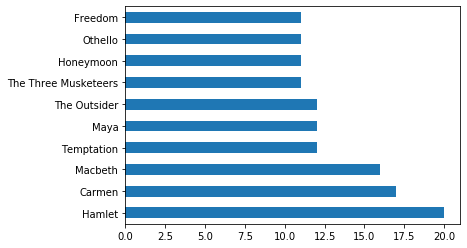

In [270]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [271]:
movies[(movies.year >= 2000) & (movies.year < 2010)].groupby('year').count().sort_values('year', ascending=False).head(1)

,title
year,
2009,6125


### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

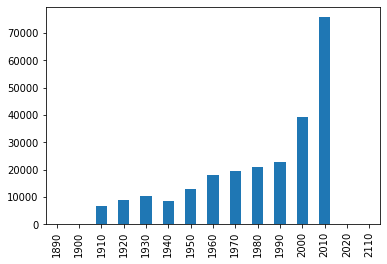

In [272]:
movies_decade = movies.copy()
movies_decade['decade'] = movies_decade.year.map(lambda x: int(x/10)*10)
#movies_decade.decade.value_counts().plot(kind='bar')
#print(movies_decade.decade.value_counts().sort_index(ascending=True))
movies_decade.decade.value_counts().sort_index(ascending=True).plot(kind='bar')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [273]:
cast_characters = cast.groupby('character')['type'].count().sort_values(ascending=False).head(10)
print(cast_characters)

character
Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: type, dtype: int64


In [274]:
cast_herself = cast[cast.character == 'Herself'].groupby('name')['title'].count().sort_values(ascending=False).head(10)
print(cast_herself)

name
Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marilyn Monroe                6
Rekha                         6
Name: title, dtype: int64


In [275]:
cast_himself = cast[cast.character == 'Himself'].groupby('name')['title'].count().sort_values(ascending=False).head(10)
print(cast_himself)

name
Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: title, dtype: int64


### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [276]:
cast_zombies = cast[cast.character.str.startswith('Zombie')]
cast_zombies_grouped = cast_zombies.groupby('character')['title'].count().nlargest(10)
print(cast_zombies_grouped)

character
Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: title, dtype: int64


In [277]:
cast_zombies = cast[cast.character.str.startswith('Police')]
cast_zombies_grouped = cast_zombies.groupby('character')['title'].count().nlargest(10)
print(cast_zombies_grouped)

character
Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: title, dtype: int64


### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

Text(0.5, 1.0, 'Keanu Reeves Roles per Year')

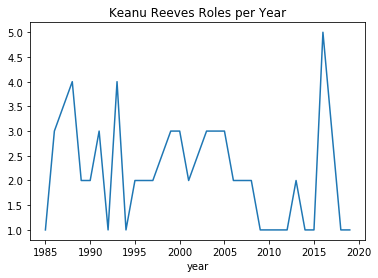

In [278]:
cast_keanu_by_year = cast[cast.name == 'Keanu Reeves'].groupby('year')['title'].count()
cast_keanu_by_year.plot()
plt.title('Keanu Reeves Roles per Year')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


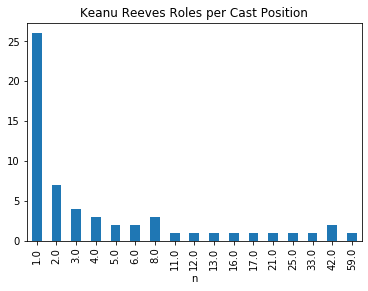

In [279]:
cast_keanu_by_n = cast[cast.name == 'Keanu Reeves'].groupby('n')['title'].count()
cast_keanu_by_n.plot(kind='bar')
plt.title('Keanu Reeves Roles per Cast Position')
plt.show()

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

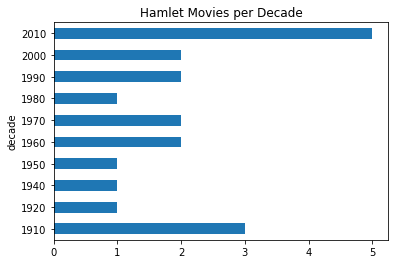

In [280]:
movies_decade_hamlet = movies_decade[movies_decade.title == 'Hamlet'].groupby('decade')['title'].count()
movies_decade_hamlet.plot(kind='barh')
plt.title('Hamlet Movies per Decade')
plt.show()

### Section II - Q8:

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [281]:
cast_leading_roles_1960s = cast[(cast.n == 1) & (cast.year>=1960) & (cast.year <=1969)].groupby('type')['title'].count()
print(cast_leading_roles_1960s)

type
actor      8320
actress    3503
Name: title, dtype: int64


In [282]:
cast_leading_roles_2000s = cast[(cast.n == 1) & (cast.year>=2000) & (cast.year <=2009)].groupby('type')['title'].count()
print(cast_leading_roles_2000s)

type
actor      18557
actress     7787
Name: title, dtype: int64


### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [283]:
cast_frank_oz_count = cast[cast.name == 'Frank Oz'].groupby(['title', 'year'])['character'].count()
cast_frank_oz_count = cast_frank_oz_count.to_frame().reset_index().rename(columns={'character': 'nroles'})
cast_frank_oz_count_gt1 = cast_frank_oz_count[cast_frank_oz_count.nroles > 1].sort_values('year')
print(cast_frank_oz_count_gt1)

                                   title  year  nroles
24                      The Muppet Movie  1979       8
0         An American Werewolf in London  1981       2
22                The Great Muppet Caper  1981       6
20                      The Dark Crystal  1982       2
25            The Muppets Take Manhattan  1984       7
2                       Follow That Bird  1985       3
23            The Muppet Christmas Carol  1992       7
7                 Muppet Treasure Island  1996       4
8                     Muppets from Space  1999       4
18  The Adventures of Elmo in Grouchland  1999       3


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [284]:
cast_frank_oz_char_repeats = cast[cast.name == 'Frank Oz'].groupby('character')['title'].count()
cast_frank_oz_char_repeats = cast_frank_oz_char_repeats.to_frame().reset_index().rename(columns={'title': 'repeats'})
cast_frank_oz_count_gt1 = cast_frank_oz_char_repeats[cast_frank_oz_char_repeats.repeats > 1].sort_values('repeats', ascending=False)
print(cast_frank_oz_count_gt1)

         character  repeats
0           Animal        6
18      Miss Piggy        6
34            Yoda        6
5   Cookie Monster        5
25   Sam the Eagle        5
10     Fozzie Bear        4
2             Bert        3
15          Grover        2


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

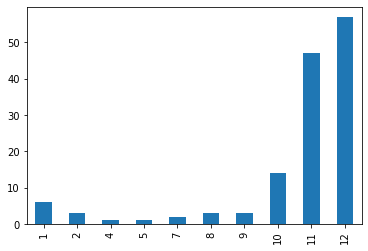

In [285]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

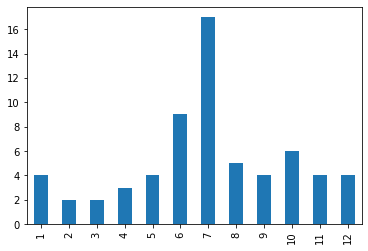

In [286]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

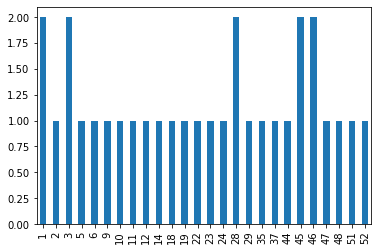

In [287]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [288]:
cast_keanu_lead = cast_keanu[cast_keanu.n == 1]
release_dates_usa = release_dates[release_dates.country == 'USA']
release_dates_keanu_lead_usa = cast_keanu_lead.merge(release_dates_usa, on='title', how='left', suffixes=('_cast','_release')).sort_values('date')
print(release_dates_keanu_lead_usa)

                               title  year_cast          name   type  \
17                             Speed       1994  Keanu Reeves  actor   
18                             Speed       1994  Keanu Reeves  actor   
21                    Sweet November       2001  Keanu Reeves  actor   
27                  The Night Before       1988  Keanu Reeves  actor   
3   Bill & Ted's Excellent Adventure       1989  Keanu Reeves  actor   
2         Bill & Ted's Bogus Journey       1991  Keanu Reeves  actor   
14                     Little Buddha       1993  Keanu Reeves  actor   
19                             Speed       1994  Keanu Reeves  actor   
11                   Johnny Mnemonic       1995  Keanu Reeves  actor   
1               A Walk in the Clouds       1995  Keanu Reeves  actor   
4                     Chain Reaction       1996  Keanu Reeves  actor   
6                  Feeling Minnesota       1996  Keanu Reeves  actor   
24              The Devil's Advocate       1997  Keanu Reeves  a

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

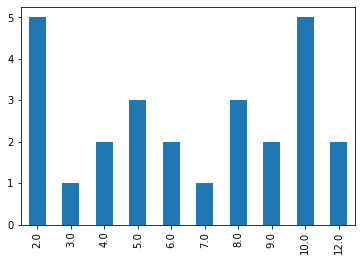

In [289]:
release_dates_keanu_lead_usa.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

                    title  year_cast          name   type  \
0         A Touch of Love       1969  Ian McKellen  actor   
1        Alfred the Great       1969  Ian McKellen  actor   
2         Animal Crackers       2017  Ian McKellen  actor   
3         Animal Crackers       2017  Ian McKellen  actor   
4               Apt Pupil       1998  Ian McKellen  actor   
..                    ...        ...           ...    ...   
62  X-Men: The Last Stand       2006  Ian McKellen  actor   
63  X-Men: The Last Stand       2006  Ian McKellen  actor   
64                     X2       2003  Ian McKellen  actor   
65                     X2       2003  Ian McKellen  actor   
66                   Zina       1985  Ian McKellen  actor   

                character    n  year_release country       date  
0                  George  2.0           NaN     NaN        NaT  
1                   Roger  5.0           NaN     NaN        NaT  
2   Horatio P. Huntington  4.0        1930.0     USA 1930-09-06  
3  

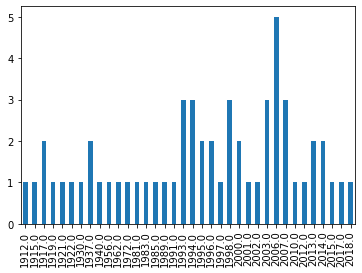

In [290]:
cast_mckellen = cast[cast.name == 'Ian McKellen']
release_dates_usa = release_dates[release_dates.country == 'USA']
release_dates_mckellen_usa = cast_mckellen.merge(release_dates_usa, on='title', how='left', suffixes=('_cast','_release'))
release_dates_mckellen_usa.date.dt.year.value_counts().sort_index().plot(kind='bar')
print(release_dates_mckellen_usa)